## Домашнее задание по модулю matplotlib и seaborn

### Задача:
Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек.

Для демонстрации возможностей визуализации я взял датасет со статистикой самоубийств  в мире в период с 1985 по 2016 гг.

In [15]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

import pandas as pd
import matplotlib.pyplot as plt

In [7]:
suicides = pd.read_csv('master.csv')
suicides.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
3835,Belize,1987,male,75+ years,0,1261,0.00,Belize1987,NaN,"276,550,000",1920,G.I. Generation
21301,Saint Lucia,1986,female,5-14 years,0,15200,0.00,Saint Lucia1986,NaN,"289,689,704",2634,Generation X
6150,Costa Rica,1996,female,5-14 years,1,385069,0.26,Costa Rica1996,NaN,"11,618,286,553",3639,Millenials
27616,Uzbekistan,1995,male,35-54 years,423,1817200,23.28,Uzbekistan1995,NaN,"13,350,468,917",681,Boomers
9343,France,2006,female,55-74 years,862,6363131,13.55,France2006,NaN,"2,318,593,651,988",40097,Silent


![title](dizraeli.jpg)

In [12]:
sum_by_sex = suicides.groupby('sex').sum()
sum_by_sex.head(2)

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
sex,,,,,,
female,27837504,1559510,26272781857,75014.77,3247.746,234612520
male,27837504,5188910,25049376579,281529.06,3247.746,234612520


In [42]:
data = sum_by_sex.loc['female':'male', ['suicides_no']]
data

,suicides_no
sex,
female,1559510
male,5188910


**Давайте выясним, влияет ли пол, на вероятность самоубийства?**

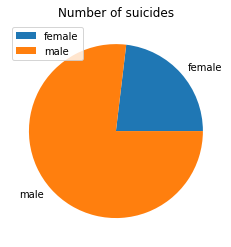

In [101]:
data.plot(kind='pie', subplots=True)
plt.title("Number of suicides")
plt.ylabel("")
plt.show()

Поразительно! Женщины намного устойчивее! Жаль в нашем датасете нет данных, о том, был ли человек женат. :(

**Ввыведем динамику колличества суицидов по годам**

In [48]:
suicides.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [56]:
s_by_years = suicides.groupby('year').sum().loc[:,['suicides_no']]

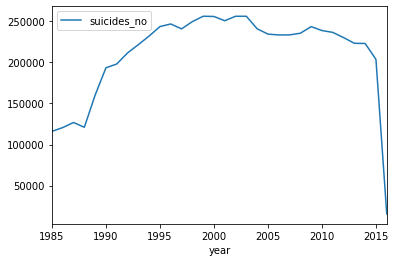

In [60]:
s_by_years.plot()

**Определим 10 стран, где процент самоубийств на 100 000 населения выше.**

In [89]:
s_by_country = suicides.groupby(['country']).mean()
s_ = s_by_country.sort_values(by = ['suicides/100k pop'], ascending=False).loc[:,['suicides/100k pop']].head(10)
s_.reset_index()

,country,suicides/100k pop
0,Lithuania,40.415573
1,Sri Lanka,35.295152
2,Russian Federation,34.892377
3,Hungary,32.761516
4,Belarus,31.075913
5,Kazakhstan,30.511282
6,Latvia,29.259325
7,Slovenia,27.827857
8,Estonia,27.276905
9,Ukraine,26.582321


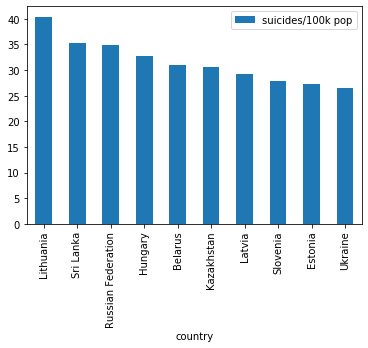

In [90]:
s_.plot(kind = 'bar')

**Вывод:** Распад Советского Союза, и крушение иделогие выбило почву под ногами многих людей.

Я одного не понимаю - Шри-Ланка? Серьезно? У вас 4 урожая в год, отличный климат и море! Что ещё нужно?

Пришла пора перейти на уровень выше, и задействовать библиотеку Seaborn
В нашем датафрейме есть градация по возрасту. Выдвинем гипотезу - зависит ли колличество суицидов от возраста? И имеет ли значение пол?

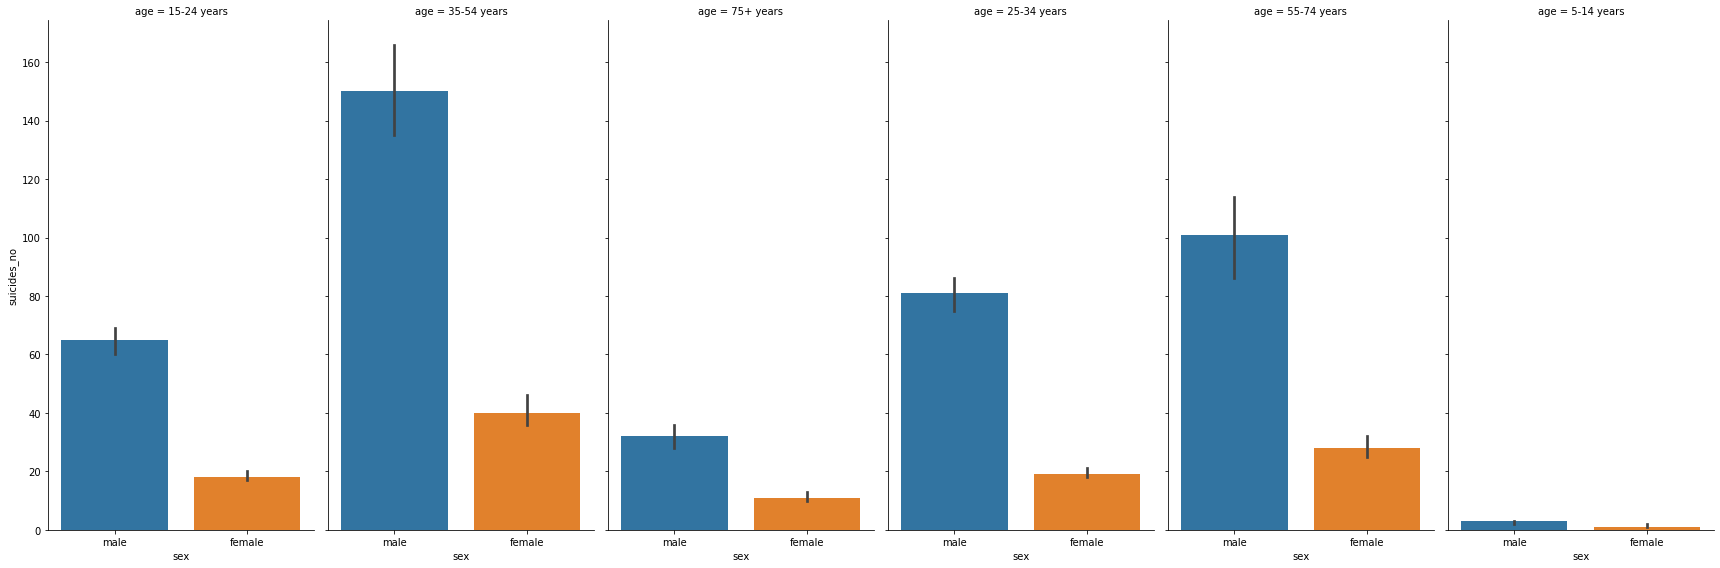

In [97]:
import seaborn as sns
from numpy import median
male_female_by_ages = sns.catplot(x="sex", y="suicides_no",col='age', data=suicides, \
                                  estimator=median,height=8, aspect=.5,kind='bar')

На столбчатой диаграмме чётко видно, что пропорции суцидов между мужчинами и женщинами сохраняются, вне зависимости от возраста.
А вот период жизни, когда вероятность суицида велика - имеет определяющее значение.
Из диаграммы видно, что самая уязвимая группа - от 35 до 54 лет. Затем - от 55 до 74, и наконец 25-34. 
Их этого можно сделать предположение, что старики и дети менее подвержены суициду, так как первые уже повидали жизнь, и поняли что всё - тлен, а вторые наивно надеются, что все впереди.
Лишь люди среднего возраста теряют надежду, и им ещё не хватает опыта смотреть на всё философски.

Давайте просто посмотрим на гистограмму и график суицидов по годам. 
Стал ли мир стабильнее за последние 40 лет?

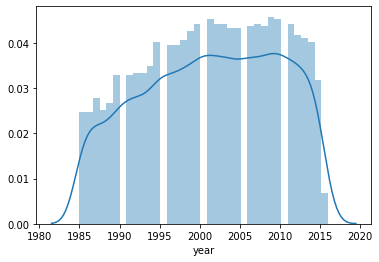

In [99]:
sns.distplot(suicides['year'])

Увы. 

Дух времени хотя и не воинствен,

по-прежнему кровав его прибой;

кончая свою жизнь самоубийством,

утопии нас тянут за собой.

Игорь Губерман (с)